
# سوال ۱: محاسبه انرژی و توان سیگنال

سیگنال x(t) = e^(-2t) * u(t) را در نظر بگیرید، که در آن u(t) تابع پله واحد است.  
۱. مشخص کنید که آیا این سیگنال دارای انرژی محدود است یا توان محدود.  
۲. انرژی یا توان آن را محاسبه کنید.  
۳. نمودار سیگنال را رسم کنید.




<ipython-input-1-c170429d7189>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  energy = np.trapz(x**2, t)


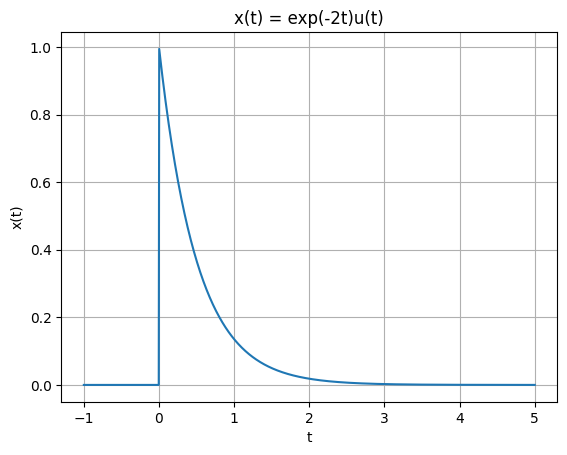

Energy of the signal: 0.2500
Average Power of the signal: 0.0416


In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-1, 5, 1000)
x = np.exp(-2 * t) * (t >= 0)

energy = np.trapz(x**2, t)
power = np.mean(x**2)

plt.plot(t, x)
plt.title("x(t) = exp(-2t)u(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

print(f"Energy of the signal: {energy:.4f}")
print(f"Average Power of the signal: {power:.4f}")



# سوال ۲: بررسی فرد یا زوج بودن سیگنال

تابع سیگنال x(t) = t * e^(-|t|) را در نظر بگیرید.  
۱. بررسی کنید که سیگنال زوج است یا فرد یا هیچ‌کدام.  
۲. نمودار سیگنال را در بازه t ∈ [-5, 5] رسم کنید.


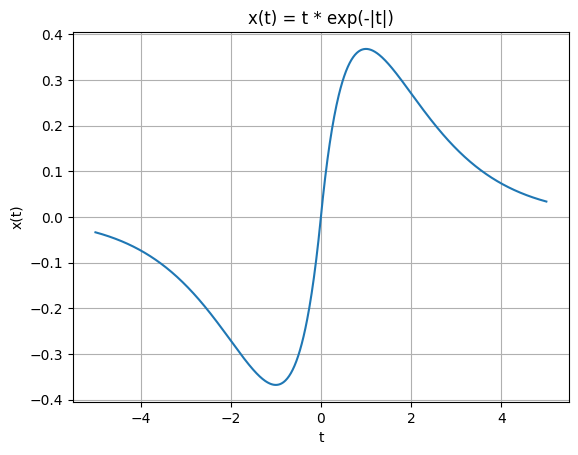

x(-t) == -x(t): True


In [2]:
t = np.linspace(-5, 5, 1000)
x = t * np.exp(-np.abs(t))

plt.plot(t, x)
plt.title("x(t) = t * exp(-|t|)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

# بررسی فرد یا زوج بودن:
x_neg = -t * np.exp(-np.abs(-t))
print("x(-t) == -x(t):", np.allclose(x_neg, -x))  # اگر True باشد سیگنال فرد است



# سوال ۳: بررسی متناوب بودن سیگنال

سیگنال x(t) = sin(2πt) + cos(5t) را بررسی کنید.  
۱. آیا سیگنال متناوب است؟  
۲. اگر بله، دوره تناوب را محاسبه کنید.  
۳. نمودار سیگنال را برای بازه t ∈ [0, 10] رسم کنید.


T1 = 1, T2 ≈ 1.2566
دوره تناوب تقریبی کل: 157.0


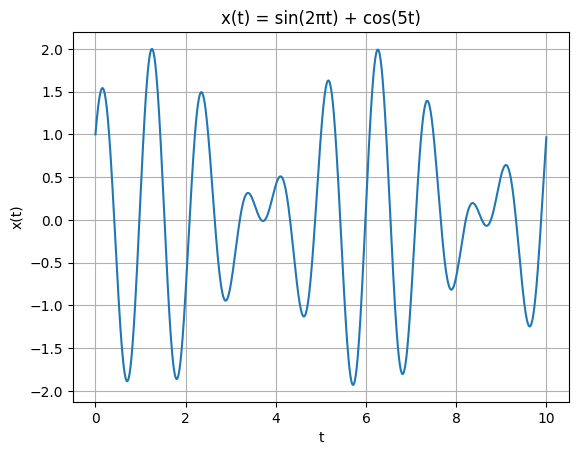

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T1 = 1  # دوره سینوس اول
T2 = 2 * np.pi / 5  # دوره کسینوس دوم

# کمترین مضرب مشترک تقریبی
T_common = np.lcm(int(T1 * 1000), int(T2 * 1000)) / 1000
print(f"T1 = {T1}, T2 ≈ {T2:.4f}")
print(f"دوره تناوب تقریبی کل: {T_common}")

# رسم نمودار
t_vals = np.linspace(0, 10, 1000)
x_vals = np.sin(2 * np.pi * t_vals) + np.cos(5 * t_vals)

plt.plot(t_vals, x_vals)
plt.title("x(t) = sin(2πt) + cos(5t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()



# سوال ۴: محاسبه تبدیل فوریه سیگنال

تابع سیگنال x(t) = rect(t/2) را در نظر بگیرید که در آن rect تابع مستطیلی به طول ۲ است.  
۱. تبدیل فوریه سیگنال را محاسبه و رسم کنید.  
۲. نمودار سیگنال در حوزه زمان و فرکانس را نشان دهید.


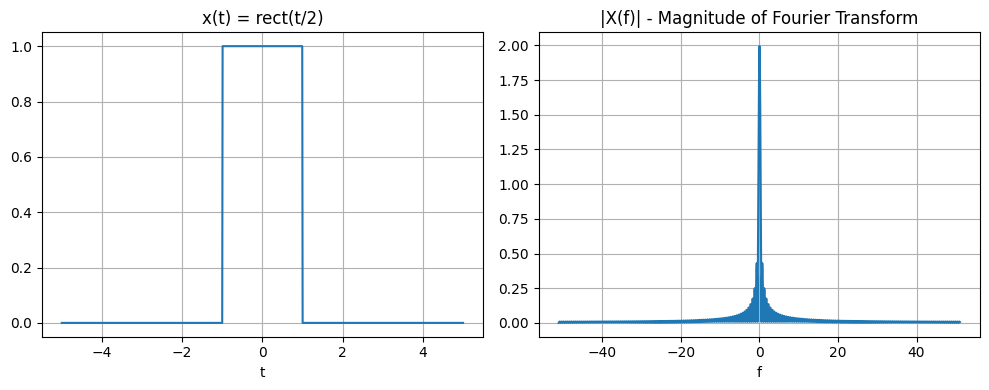

In [4]:
from scipy.fft import fftshift, fft, fftfreq

t = np.linspace(-5, 5, 1024)
x = np.where(np.abs(t) <= 1, 1, 0)

dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), d=dt))
X = fftshift(fft(x)) * dt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.title("x(t) = rect(t/2)")
plt.xlabel("t")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f, np.abs(X))
plt.title("|X(f)| - Magnitude of Fourier Transform")
plt.xlabel("f")
plt.grid(True)
plt.tight_layout()
plt.show()



# سوال ۵: پاسخ سیستم به ورودی نمایی

فرض کنید سیستم خطی و تغییرناپذیر با زمان دارای پاسخ ضربه‌ای h(t) = e^(-t) * u(t) باشد.  
اگر ورودی سیستم x(t) = e^(-2t) * u(t) باشد:  
۱. پاسخ خروجی سیستم y(t) را محاسبه کنید.  
۲. نمودار y(t) را رسم کنید.


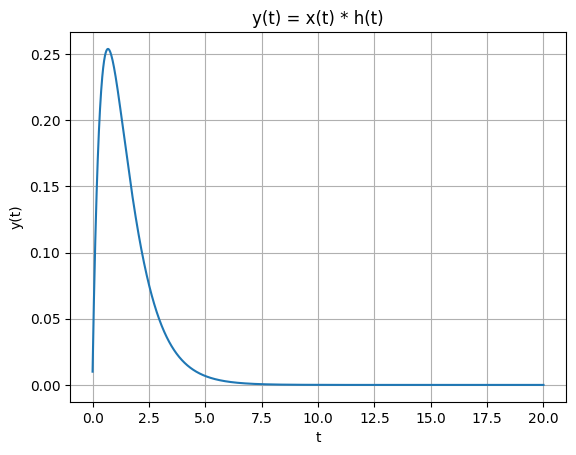

In [5]:

from scipy.signal import convolve

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

x = np.exp(-2 * t)
h = np.exp(-t)

y = convolve(x, h) * dt
t_y = np.linspace(0, 2 * t[-1], len(y))

plt.plot(t_y, y)
plt.title("y(t) = x(t) * h(t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()
